<a href="https://colab.research.google.com/github/tottenjordan/time-dilated-computing/blob/master/142_3d_interactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Space is the Place

The intent of this notebook is to explore a 3-dimensional space around our solar system. For the 100 closest star systems, [RECONS](http://www.recons.org/TOP100.posted.htm) provides the following data for 142 of the closest stars:



1.   The right acension on the sky in hours, minutes, seconds
2.   Declination in the sky, in degrees, arcminutes, arcseconds
3.   Trigonometric parallax, in arcseconds
4.   The estimated mass in units of the Sun's mass 1.00 Msun 




In [0]:
#import matplotlib
#matplotlib.use('Agg')

In [9]:
#Imports
import pandas as pd
import math
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving RECON_star_data.csv to RECON_star_data (1).csv


To identify the location of celestial objects, we create an XYZ coordinate system with our Sun located at the center (0,0,0). To calculate the values of X, Y,  and Z; we first need to calculate three values we will refer to as A, B, and C.


In [10]:
#Load Data
recon = pd.read_csv("RECON_star_data.csv")

jt_star = recon[['ID','LHS','RA_hr','RA_min','RA_sec','DEC_degrees','DEC_min','DEC_sec',
                 'ProperMo_arcsec_year','ProperMo_direction_degree','trig_par','mass_est']].copy()
jt_star.head(4)

,ID,LHS,RA_hr,RA_min,RA_sec,DEC_degrees,DEC_min,DEC_sec,ProperMo_arcsec_year,ProperMo_direction_degree,trig_par,mass_est
0,2,49.0,14,29,43.0,-62,40,46,3.853,281.5,0.76885,0.11
1,3,50.0,14,39,36.5,-60,50,2,3.710,277.5,0.74723,1.14
2,4,51.0,14,39,35.1,-60,50,14,3.724,284.8,0.74723,0.92
3,5,57.0,17,57,48.5,4,41,36,10.358,355.6,0.54551,0.16


Convert Right Acension (RA) to degrees:

$$A = (RA_{hours} \cdot 15) + (RA_{minutes} \cdot 0.25) + (RA_{seconds} \cdot 0.004166)$$

In [0]:
def RA(hrs, min, sec):
    return hrs*15+min*0.25+sec*0.004166

jt_star['A'] = np.vectorize(RA)(jt_star['RA_hr'], jt_star['RA_min'], jt_star['RA_sec'])

Calculate one value, in degrees, for declination (D). Because the declination can range between (-90, 90) degrees, the absolute value of the degrees must be used to calculate this value. The sign of the degrees is applied to calculate the final value. 

$$B = (  \mid D_{degrees} \mid + \frac{D_{minutes}}{60} + \frac{D_{sec}}{3600}) \cdot SIGN(D_{degrees})$$ 

In [0]:
def declination(degree, min, sec):
    if degree < 0:
        SIGN = -1
    else:
        SIGN = +1
    return (abs(degree) + (min/60) + (sec/3600))*SIGN

declination(-15, 56, 14.89)
declination(51, 43, 8.62)

jt_star['B'] = np.vectorize(declination)(jt_star['DEC_degrees'], jt_star['DEC_min'], jt_star['DEC_sec'])

C is the distance in lightyears or parsecs from the Sun. For this notebook, we will use lightyears

In [0]:
def parsec(arcseconds):
    return 1/arcseconds

# check Alpha centauri
parsec(0.76813)

jt_star['C_parsec'] = jt_star.trig_par.apply(parsec)

def lightyears(parsec):
    return parsec*3.26

jt_star['C_lightyears'] = jt_star.C_parsec.apply(lightyears)

To calculate the X, Y, Z coordinates:




$$X = (C \cdot cos(B)) \cdot cos(A)$$;
$$Y = (C \cdot cos(B)) \cdot sin(A)$$;
$$Z = C \cdot sin(B)$$







In [0]:
def cartesianX(A,B,C):
    return (C * math.cos(B)) * math.cos(A)

jt_star['X'] = np.vectorize(cartesianX)(jt_star['A'], jt_star['B'], jt_star['C_lightyears'])

def cartesianY(A,B,C):
    return (C * math.cos(B)) * math.sin(A)

jt_star['Y'] = np.vectorize(cartesianY)(jt_star['A'], jt_star['B'], jt_star['C_lightyears'])

def cartesianZ(B,C):
    return C * math.sin(B)

jt_star['Z'] = np.vectorize(cartesianZ)(jt_star['B'], jt_star['C_lightyears'])

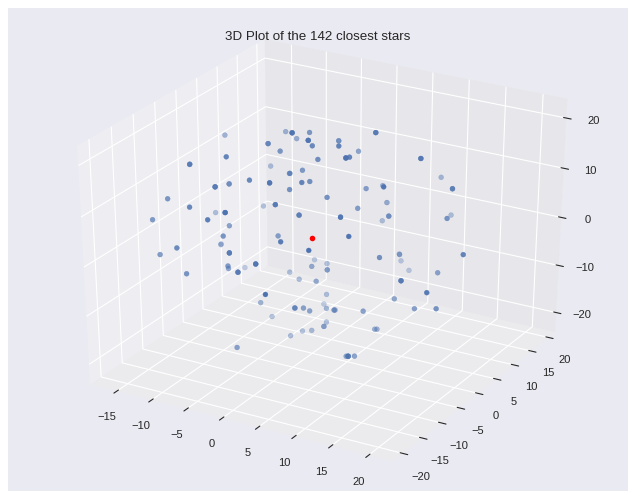

In [15]:
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure

#matplotlib inline
import matplotlib.pyplot as plt

%matplotlib inline

z = jt_star['Z']
x = jt_star['X']
y = jt_star['Y']
mass = jt_star['mass_est']*25

#figure(num=None, figsize=(8,6), dpi=80)
fig_3d = plt.figure(num=None, figsize=(10,8), dpi=80)
spac3d = fig_3d.add_subplot(1,1,1, projection='3d')
spac3d.scatter(x,y,z, cmap='autumn', marker='o')
spac3d.plot([0],[0],[0], marker ='o', c='red', markersize=5)
#plt.colorbar();
#spac3d.set_xlabel('x')
#spac3d.set_zlabel('z')
#spac3d.set_ylabel('y')
plt.title("3D Plot of the 142 closest stars")
plt.show()